<a href="https://colab.research.google.com/github/asir928/IDS/blob/main/HW6/HW6_Problem1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Asir Nayeef

# **Project 6 - Problem 1 (Python)**

1. Importing the data and converting it

In [2]:
# import necessary libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from matplotlib.pyplot import figure
import seaborn as sns

# convert to dataframe
adult_training = pd.read_csv("adult_training.csv")

# summarize the datafrome
adult_training.describe()


,age,education,capital-gain,capital-loss
count,14797.000000,14797.000000,14797.000000,14797.000000
mean,38.687437,10.068798,1066.581604,88.580793
std,13.678875,2.598297,7255.455373,406.322208
min,17.000000,1.000000,0.000000,0.000000
25%,28.000000,9.000000,0.000000,0.000000
50%,37.000000,10.000000,0.000000,0.000000
75%,48.000000,12.000000,0.000000,0.000000
max,90.000000,16.000000,99999.000000,4356.000000


2. Write functions.

In [3]:
def makeDTmodel(cri, x_t, y_t):
  # make model
  return DecisionTreeClassifier(criterion = cri, max_leaf_nodes=5, random_state=120).fit(x_t,y_t)

In [4]:
def displayTree(classifier, var):
  # plot tree
  tree.plot_tree(classifier, feature_names=var.columns.values.tolist(),
                                class_names=cn,
                                filled = True)
  # text recreation
  txt=tree.export_text(classifier, feature_names=var.columns.values.tolist())

  # print it out
  print(txt)


In [5]:
def displayCM(classifier, x_tr, y_tr, x_te, y_te):
  # record  predictions
  predictions = classifier.predict(x_te)
  # compute the TP, TN, FP, and FN
  cm=confusion_matrix(y_true=y_te,
                           y_pred = predictions)
  # print it
  print(cm)

  plt.figure(figsize=(8,8))
  sns.heatmap(cm, annot=True,
            linewidths=.5, square = True, cmap = 'Oranges_r', fmt='0.4g');

  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')



In [6]:
#model comparison
def compareModels(c1, c2):
  # get scores
  score1 = round(c1.score(X_train, y_train), 2) # training score
  score2 = round(c1.score(X_test, y_test), 2) # testing score

  print ("C1 Training and Testing scores: %.2f, %.2f" %  (score1, score2))
  score3 = round(c2.score(X_train, y_train), 2) # training score
  score4 = round(c2.score(X_test, y_test), 2)  # testing score

  print ("C2 Training and Testing scores: %.2f, %.2f" %  (score3, score4))
  # dicts
  labels = ['C1', 'C2']
  training_scores = [score1, score3]
  testing_scores =  [score2, score4]

  x = np.arange(2)  # label locations
  width = 0.3  # bar width

  fig, ax = plt.subplots()
  rects1 = ax.bar(x - width/2, training_scores, width, label='Training', color='navy')
  rects2 = ax.bar(x + width/2, testing_scores, width, label='Testing', color='orange')

  # now the graph itself
  ax.set_ylabel('Accuracy')
  ax.set_xticks(x)
  ax.set_ylim(0,1)
  ax.set_xticklabels(labels)
  ax.legend(bbox_to_anchor = (1.3, 1.0), loc='upper right')

  # print plot
  plt.title('Model Comparisons')
  plt.show()

3. Prepare dataframe

In [7]:
#new predictor
adult_training['capital-gains-losses'] = adult_training['capital-gain'] + abs(adult_training['capital-loss'])

#new dataframe
new_adult_training = adult_training.filter(['marital-status','capital-gains-losses','income'], axis=1)
# first 10 entries
new_adult_training.head(10)

,marital-status,capital-gains-losses,income
0,Married-civ-spouse,0,<=50K
1,Divorced,0,<=50K
2,Married-spouse-absent,0,<=50K
3,Married-civ-spouse,0,>50K
4,Never-married,14084,>50K
5,Married-civ-spouse,0,>50K
6,Married-civ-spouse,0,<=50K
7,Married-civ-spouse,2042,<=50K
8,Married-civ-spouse,0,>50K
9,Divorced,0,<=50K


In [8]:
# import libraries
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

# new dataframe
enc_adult_training = pd.DataFrame()

# encode everything that is categoric or boolean
for i in range(0, new_adult_training.shape[1]):
    if new_adult_training.dtypes[i]=='object' or new_adult_training.dtypes[i]=='bool':
        enc_adult_training[new_adult_training.columns[i]] = le.fit_transform(new_adult_training[new_adult_training.columns[i]])
    else:
        enc_adult_training[new_adult_training.columns[i]] = new_adult_training[new_adult_training.columns[i]]

enc_adult_training.head(10)

,marital-status,capital-gains-losses,income
0,2,0,0
1,0,0,0
2,3,0,0
3,2,0,1
4,4,14084,1
5,2,0,1
6,2,0,0
7,2,2042,0
8,2,0,1
9,0,0,0


Training size: (11837, 2)
Test size: (2960, 2)


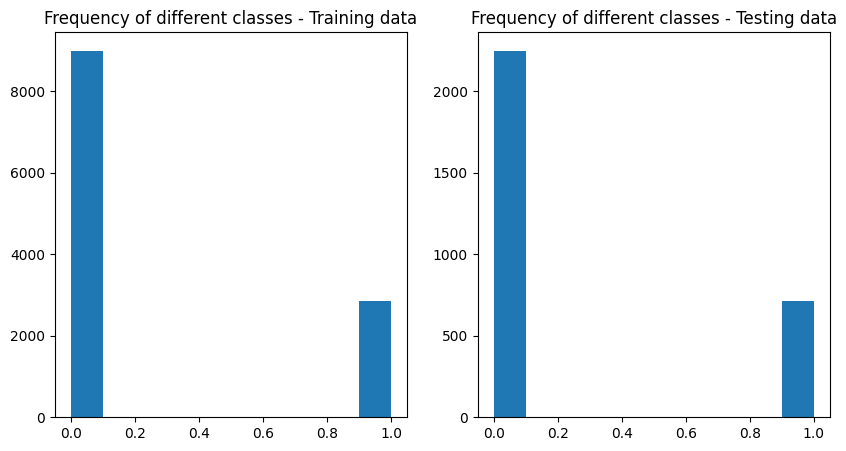

In [9]:
# X and y
X = enc_adult_training.filter(['marital-status','capital-gains-losses'], axis=1)
y = enc_adult_training['income']

# 80-20 split
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=42, shuffle=True, train_size=0.80, stratify=y)

# print training and test sizes
print("Training size:", X_train.shape)
print("Test size:", X_test.shape)

# class distributions
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(y_train);
plt.title('Frequency of different classes - Training data');

plt.subplot(1,2,2)
plt.hist(y_test);
plt.title('Frequency of different classes - Testing data');

3. Test functions

In [10]:
# make labels and classifiers
cn = ['low_income', 'hi_income']
cart_classifier = makeDTmodel("gini", X_train, y_train)
c5_classifier = makeDTmodel("entropy", X_train, y_train)

|--- capital-gains-losses <= 5095.50
|   |--- marital-status <= 2.50
|   |   |--- marital-status <= 0.50
|   |   |   |--- class: 0
|   |   |--- marital-status >  0.50
|   |   |   |--- capital-gains-losses <= 1811.00
|   |   |   |   |--- class: 0
|   |   |   |--- capital-gains-losses >  1811.00
|   |   |   |   |--- class: 1
|   |--- marital-status >  2.50
|   |   |--- class: 0
|--- capital-gains-losses >  5095.50
|   |--- class: 1



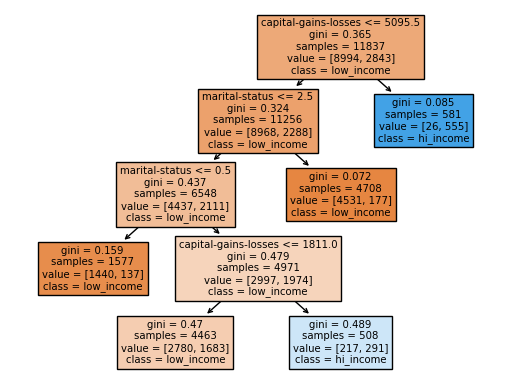

In [11]:
# display text and graphic representation of CART classifier
displayTree(cart_classifier, X)

|--- marital-status <= 2.50
|   |--- capital-gains-losses <= 5095.50
|   |   |--- marital-status <= 0.50
|   |   |   |--- class: 0
|   |   |--- marital-status >  0.50
|   |   |   |--- class: 0
|   |--- capital-gains-losses >  5095.50
|   |   |--- class: 1
|--- marital-status >  2.50
|   |--- capital-gains-losses <= 4718.50
|   |   |--- class: 0
|   |--- capital-gains-losses >  4718.50
|   |   |--- class: 1



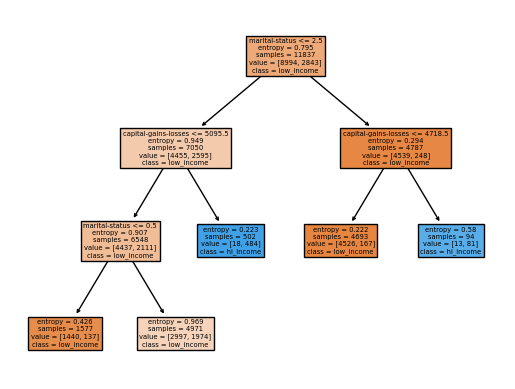

In [12]:
# display text and graphic representation of C5.0 classifier
displayTree(c5_classifier, X)

[[2187   62]
 [ 511  200]]


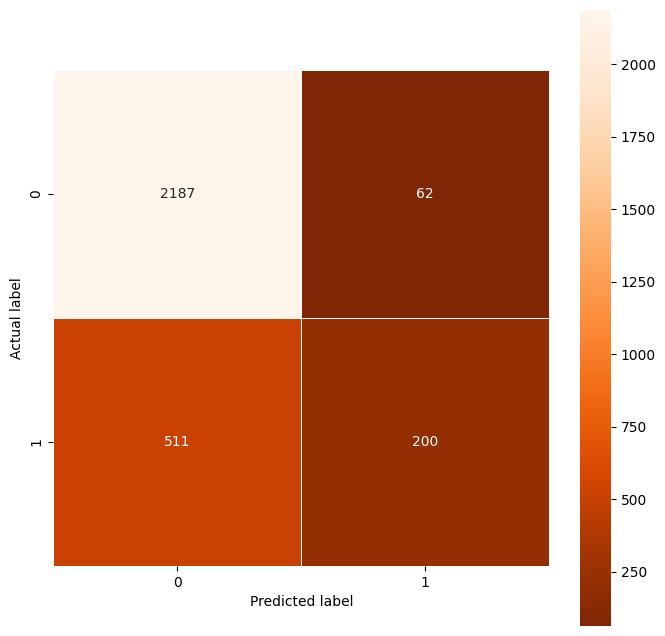

In [13]:
# display text and heatmap of CART confusion matrix
displayCM(cart_classifier, X_train, y_train, X_test, y_test)

[[2235   14]
 [ 583  128]]


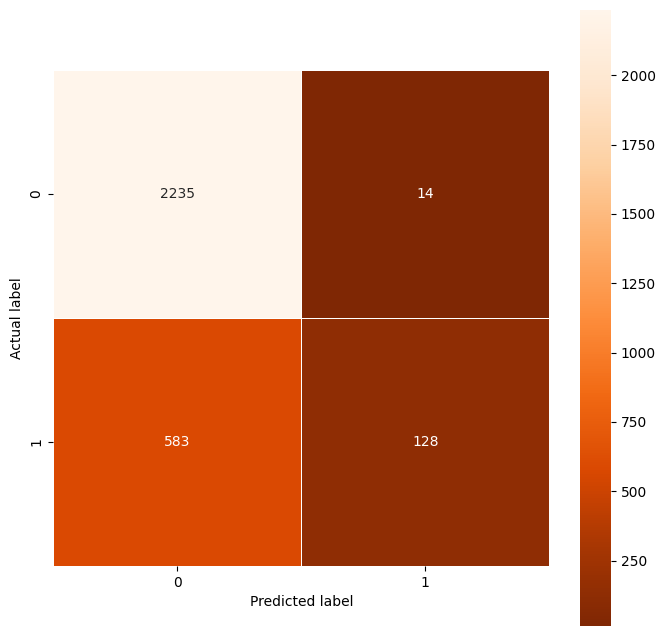

In [14]:
# display text and heatmap of CART confusion matrix
displayCM(c5_classifier, X_train, y_train, X_test, y_test)

C1 Training and Testing scores: 0.81, 0.81
C2 Training and Testing scores: 0.80, 0.80


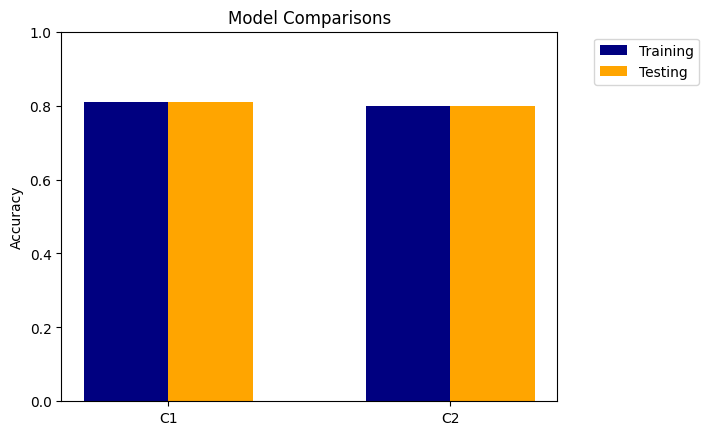

In [15]:
# create and display plots of side-by-side model comparisons
compareModels(cart_classifier, c5_classifier)

3. Analyze effects of max_depth and max_leaf_nodes on classification accuracy

 max_depth=5 and max_leaf_node=2

In [34]:
cart_classifier = DecisionTreeClassifier(criterion = "gini",
                                       max_leaf_nodes=5,
                                       random_state = 120, max_depth=2).fit(X_train,y_train)
c5_classifier = DecisionTreeClassifier(criterion = "entropy",
                                       max_leaf_nodes=5,
                                       random_state = 120, max_depth=2).fit(X_train,y_train)


|--- capital-gains-losses <= 5095.50
|   |--- marital-status <= 2.50
|   |   |--- class: 0
|   |--- marital-status >  2.50
|   |   |--- class: 0
|--- capital-gains-losses >  5095.50
|   |--- capital-gains-losses <= 7073.50
|   |   |--- class: 1
|   |--- capital-gains-losses >  7073.50
|   |   |--- class: 1



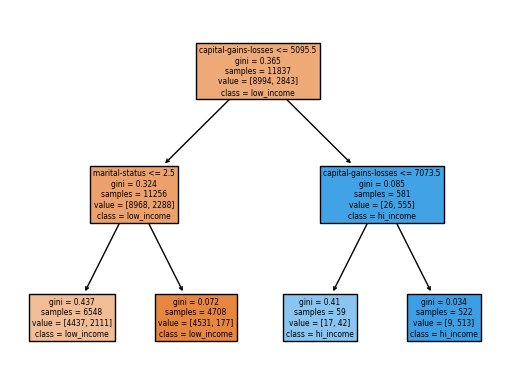

In [41]:
displayTree(cart_classifier, X)

|--- marital-status <= 2.50
|   |--- capital-gains-losses <= 5095.50
|   |   |--- class: 0
|   |--- capital-gains-losses >  5095.50
|   |   |--- class: 1
|--- marital-status >  2.50
|   |--- capital-gains-losses <= 4718.50
|   |   |--- class: 0
|   |--- capital-gains-losses >  4718.50
|   |   |--- class: 1



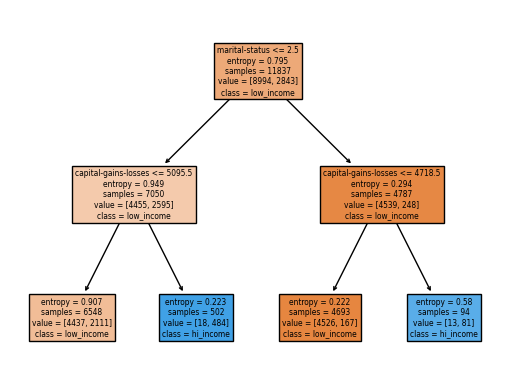

In [40]:
displayTree(c5_classifier, X)

[[2238   11]
 [ 583  128]]
[[2235   14]
 [ 583  128]]


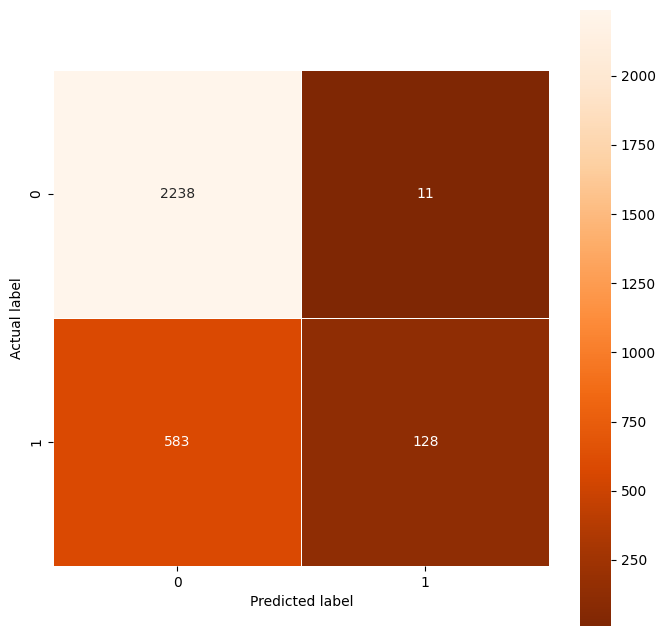

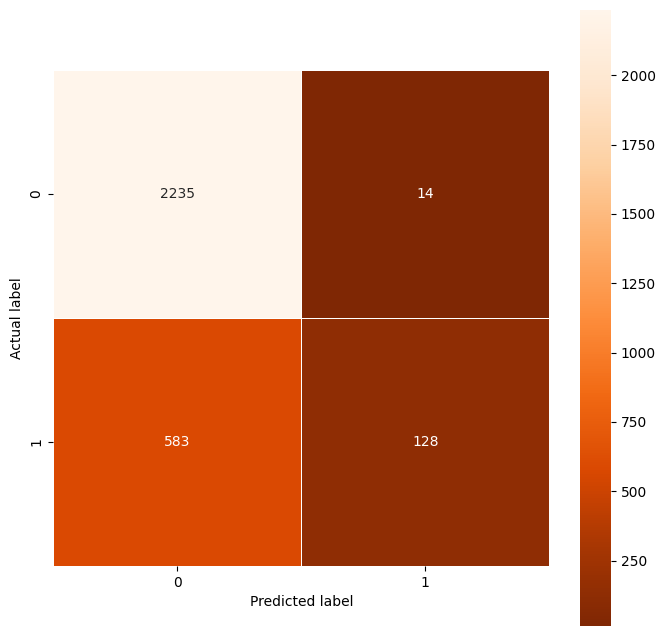

In [38]:
displayCM(cart_classifier, X_train, y_train, X_test, y_test)
displayCM(c5_classifier, X_train, y_train, X_test, y_test)

C1 Training and Testing scores: 0.80, 0.80
C2 Training and Testing scores: 0.80, 0.80


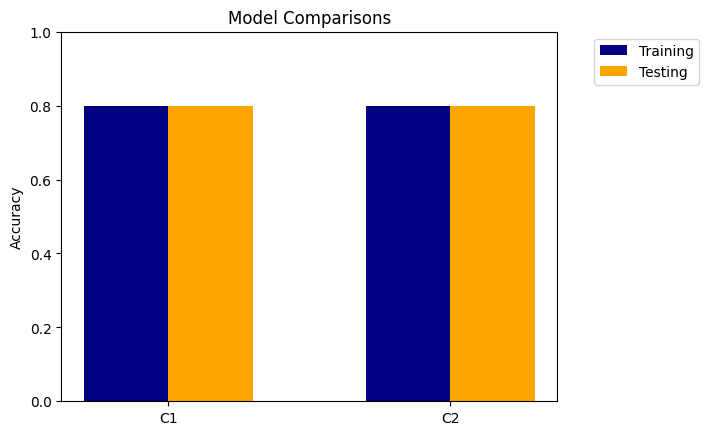

In [39]:
compareModels(cart_classifier, c5_classifier)

[ max_depth=4 and max_leaf_node=3

In [42]:
cart_classifier = DecisionTreeClassifier(criterion = "gini",
                                       max_leaf_nodes=4,
                                       random_state = 120, max_depth=3).fit(X_train,y_train)
c5_classifier = DecisionTreeClassifier(criterion = "entropy",
                                       max_leaf_nodes=4,
                                       random_state = 120, max_depth=3).fit(X_train,y_train)

|--- capital-gains-losses <= 5095.50
|   |--- marital-status <= 2.50
|   |   |--- marital-status <= 0.50
|   |   |   |--- class: 0
|   |   |--- marital-status >  0.50
|   |   |   |--- class: 0
|   |--- marital-status >  2.50
|   |   |--- class: 0
|--- capital-gains-losses >  5095.50
|   |--- class: 1



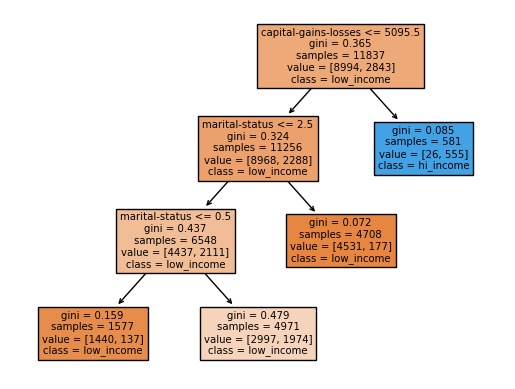

In [43]:
displayTree(cart_classifier, X)

|--- marital-status <= 2.50
|   |--- capital-gains-losses <= 5095.50
|   |   |--- marital-status <= 0.50
|   |   |   |--- class: 0
|   |   |--- marital-status >  0.50
|   |   |   |--- class: 0
|   |--- capital-gains-losses >  5095.50
|   |   |--- class: 1
|--- marital-status >  2.50
|   |--- class: 0



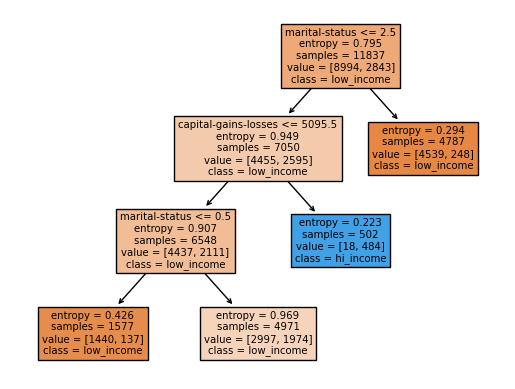

In [44]:
displayTree(c5_classifier, X)

[[2238   11]
 [ 583  128]]
[[2243    6]
 [ 597  114]]


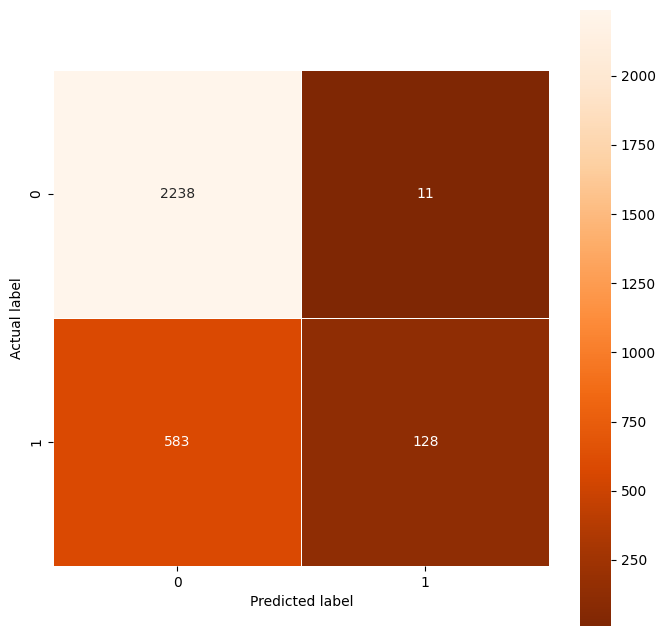

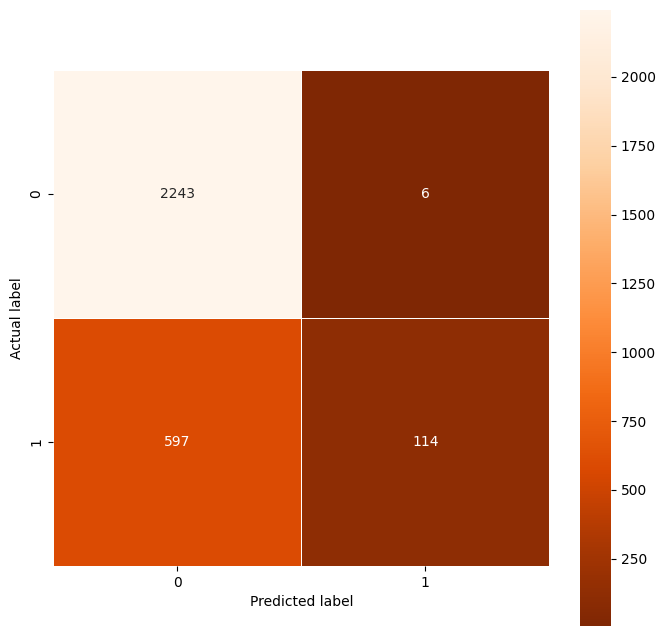

In [45]:
displayCM(cart_classifier, X_train, y_train, X_test, y_test)
displayCM(c5_classifier, X_train, y_train, X_test, y_test)

C1 Training and Testing scores: 0.80, 0.80
C2 Training and Testing scores: 0.80, 0.80


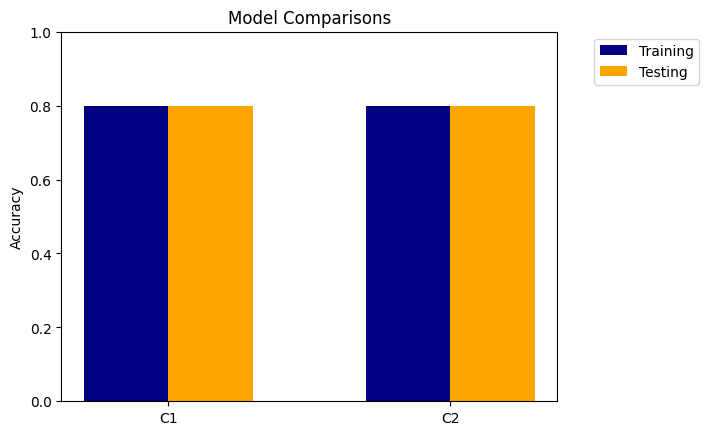

In [46]:
compareModels(cart_classifier, c5_classifier)

max_depth=3 and max_leaf_node=4

In [47]:
cart_classifier = DecisionTreeClassifier(criterion = "gini",
                                       max_leaf_nodes=3,
                                       random_state = 120, max_depth=4).fit(X_train,y_train)
c5_classifier = DecisionTreeClassifier(criterion = "entropy",
                                       max_leaf_nodes=3,
                                       random_state = 120, max_depth=4).fit(X_train,y_train)

|--- capital-gains-losses <= 5095.50
|   |--- marital-status <= 2.50
|   |   |--- class: 0
|   |--- marital-status >  2.50
|   |   |--- class: 0
|--- capital-gains-losses >  5095.50
|   |--- class: 1

|--- marital-status <= 2.50
|   |--- capital-gains-losses <= 5095.50
|   |   |--- class: 0
|   |--- capital-gains-losses >  5095.50
|   |   |--- class: 1
|--- marital-status >  2.50
|   |--- class: 0



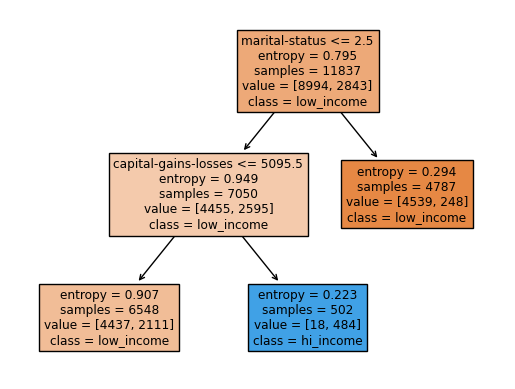

In [48]:
displayTree(cart_classifier, X)


|--- marital-status <= 2.50
|   |--- capital-gains-losses <= 5095.50
|   |   |--- class: 0
|   |--- capital-gains-losses >  5095.50
|   |   |--- class: 1
|--- marital-status >  2.50
|   |--- class: 0



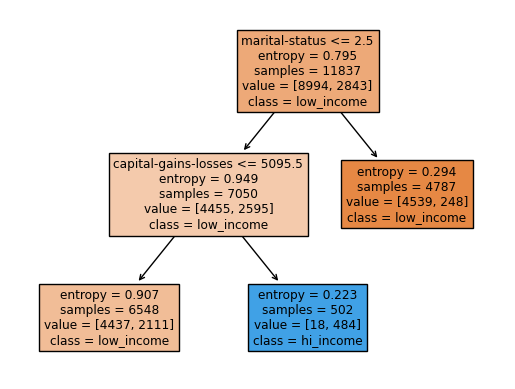

In [49]:
displayTree(c5_classifier, X)

[[2238   11]
 [ 583  128]]
[[2243    6]
 [ 597  114]]


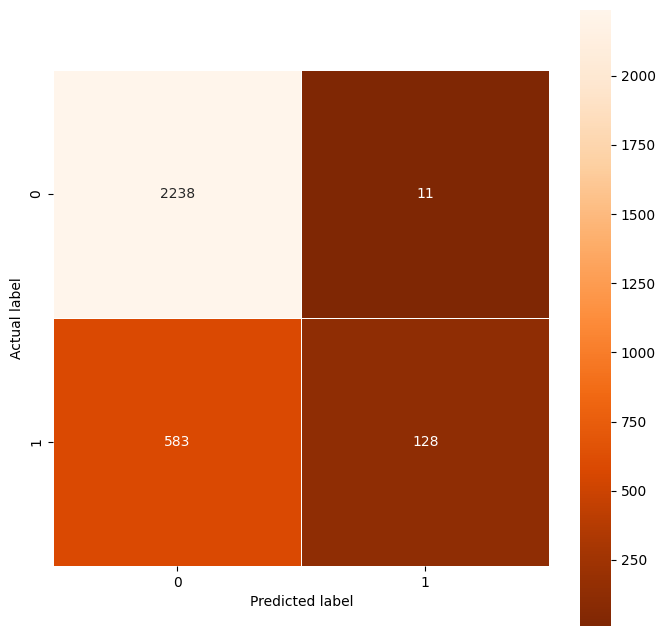

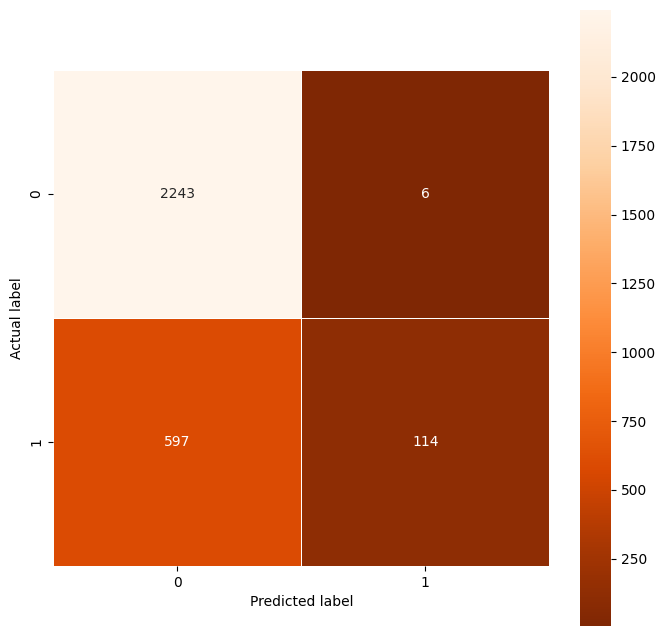

In [50]:
displayCM(cart_classifier, X_train, y_train, X_test, y_test)
displayCM(c5_classifier, X_train, y_train, X_test, y_test)

C1 Training and Testing scores: 0.80, 0.80
C2 Training and Testing scores: 0.80, 0.80


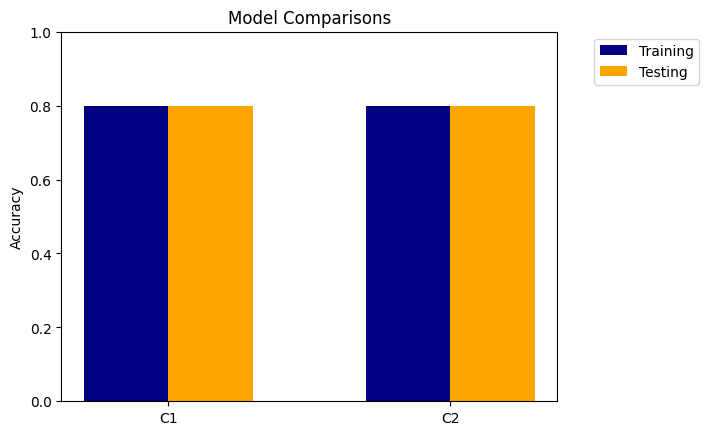

In [51]:
compareModels(cart_classifier, c5_classifier)

max_leaf_nodes=2 and max_depth = 5

In [52]:
cart_classifier = DecisionTreeClassifier(criterion = "gini",
                                       max_leaf_nodes=2,
                                       random_state = 120, max_depth=5).fit(X_train,y_train)
c5_classifier = DecisionTreeClassifier(criterion = "entropy",
                                       max_leaf_nodes=2,
                                       random_state = 120, max_depth=5).fit(X_train,y_train)

|--- capital-gains-losses <= 5095.50
|   |--- class: 0
|--- capital-gains-losses >  5095.50
|   |--- class: 1



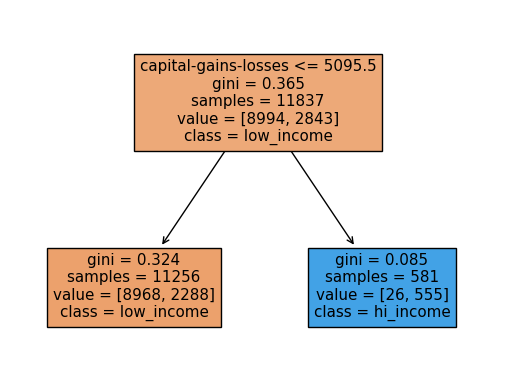

In [53]:
displayTree(cart_classifier, X)

|--- marital-status <= 2.50
|   |--- class: 0
|--- marital-status >  2.50
|   |--- class: 0



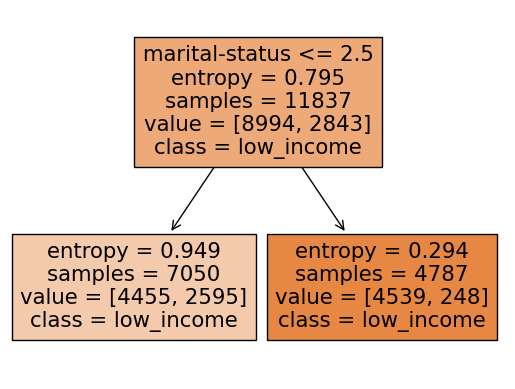

In [54]:
displayTree(c5_classifier, X)

[[2238   11]
 [ 583  128]]
[[2249    0]
 [ 711    0]]


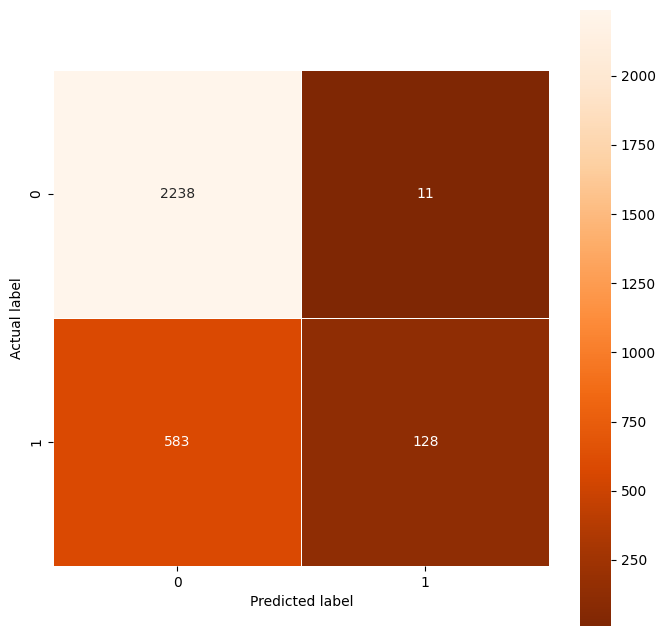

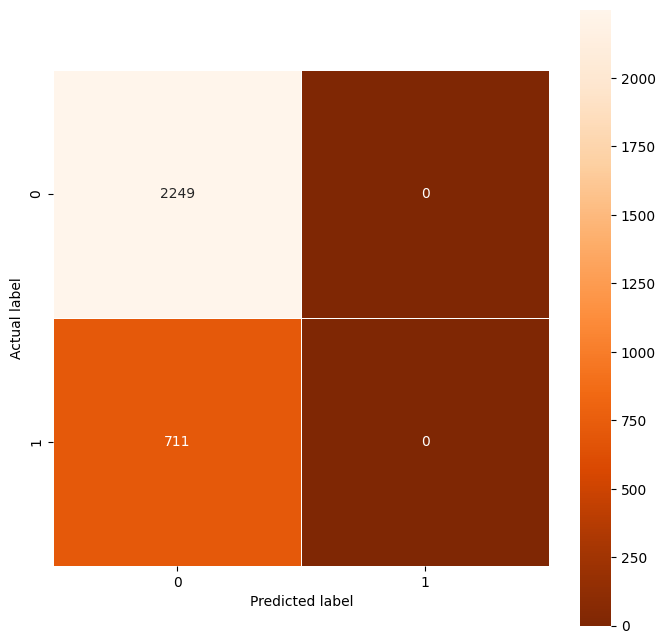

In [55]:
displayCM(cart_classifier, X_train, y_train, X_test, y_test)
displayCM(c5_classifier, X_train, y_train, X_test, y_test)

C1 Training and Testing scores: 0.81, 0.81
C2 Training and Testing scores: 0.80, 0.80


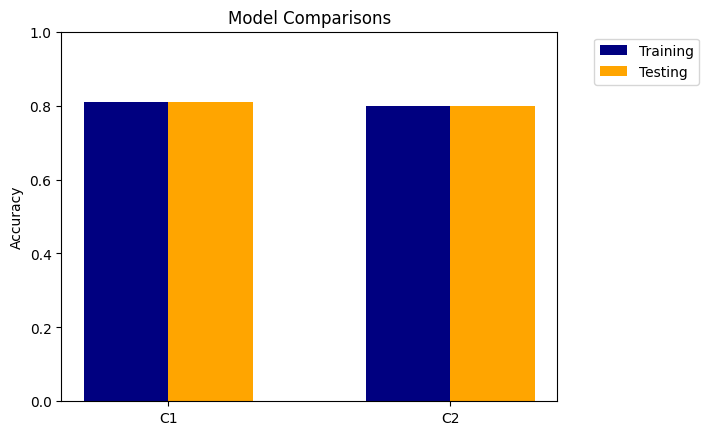

In [16]:
compareModels(cart_classifier, c5_classifier)

None

In [18]:
cart_classifier = DecisionTreeClassifier(criterion = "gini",
                                       max_leaf_nodes=None,
                                       random_state = 120, max_depth=None).fit(X_train,y_train)
c5_classifier = DecisionTreeClassifier(criterion = "entropy",
                                       max_leaf_nodes=None,
                                       random_state = 120, max_depth=None).fit(X_train,y_train)

|--- capital-gains-losses <= 5095.50
|   |--- marital-status <= 2.50
|   |   |--- marital-status <= 0.50
|   |   |   |--- capital-gains-losses <= 4668.50
|   |   |   |   |--- capital-gains-losses <= 2232.00
|   |   |   |   |   |--- capital-gains-losses <= 1758.50
|   |   |   |   |   |   |--- capital-gains-losses <= 1748.00
|   |   |   |   |   |   |   |--- capital-gains-losses <= 1577.00
|   |   |   |   |   |   |   |   |--- capital-gains-losses <= 1535.00
|   |   |   |   |   |   |   |   |   |--- capital-gains-losses <= 106.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- capital-gains-losses >  106.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- capital-gains-losses >  1535.00
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- capital-gains-losses >  1577.00
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- capital-gains-losses >  1748.0

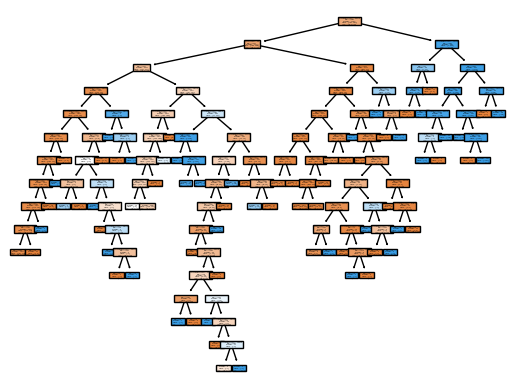

In [19]:
displayTree(cart_classifier, X)

|--- marital-status <= 2.50
|   |--- capital-gains-losses <= 5095.50
|   |   |--- marital-status <= 0.50
|   |   |   |--- capital-gains-losses <= 2232.00
|   |   |   |   |--- capital-gains-losses <= 1758.50
|   |   |   |   |   |--- capital-gains-losses <= 1748.00
|   |   |   |   |   |   |--- capital-gains-losses <= 1577.00
|   |   |   |   |   |   |   |--- capital-gains-losses <= 1535.00
|   |   |   |   |   |   |   |   |--- capital-gains-losses <= 106.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- capital-gains-losses >  106.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- capital-gains-losses >  1535.00
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- capital-gains-losses >  1577.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- capital-gains-losses >  1748.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- capital-gains-losses >  1758.50
|   |   |   

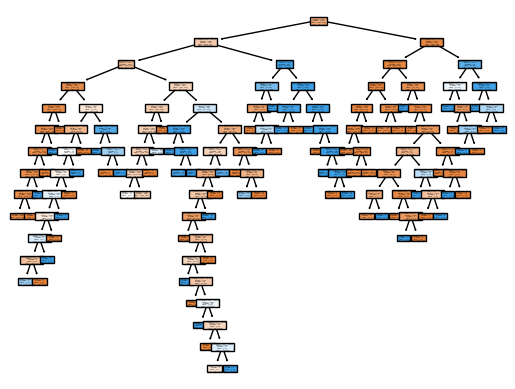

In [20]:
displayTree(c5_classifier, X)

[[2238   11]
 [ 502  209]]
[[2237   12]
 [ 502  209]]


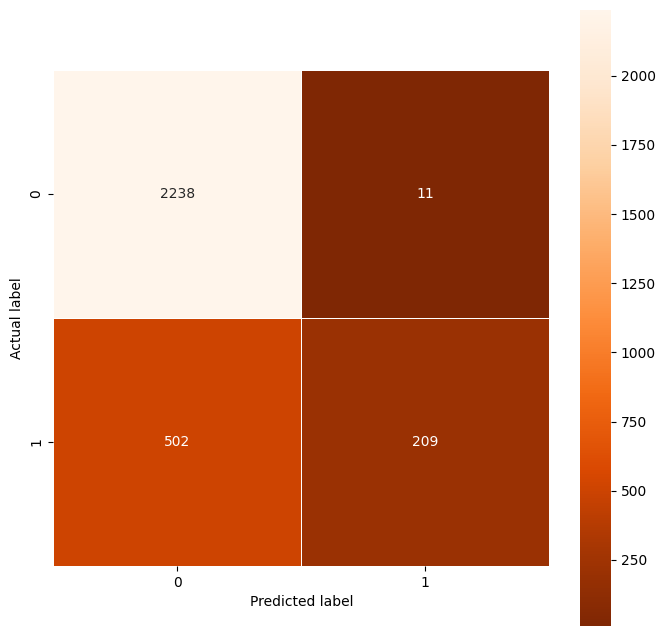

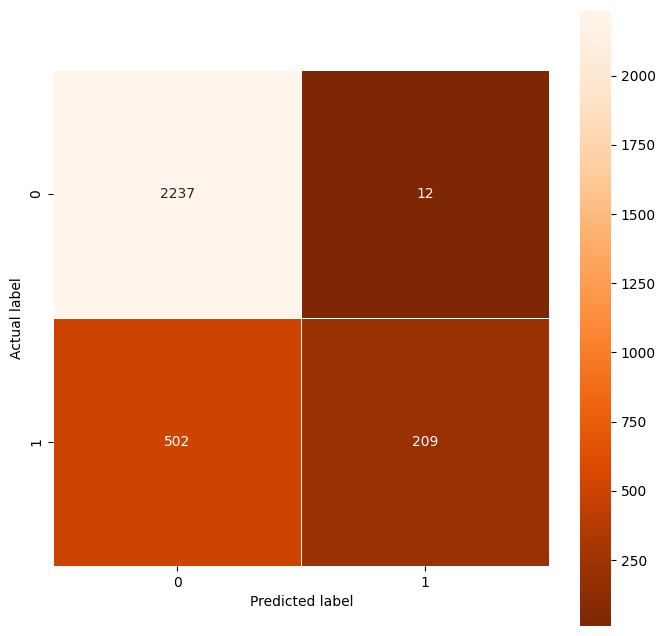

In [21]:
displayCM(cart_classifier, X_train, y_train, X_test, y_test)
displayCM(c5_classifier, X_train, y_train, X_test, y_test)

C1 Training and Testing scores: 0.83, 0.83
C2 Training and Testing scores: 0.83, 0.83


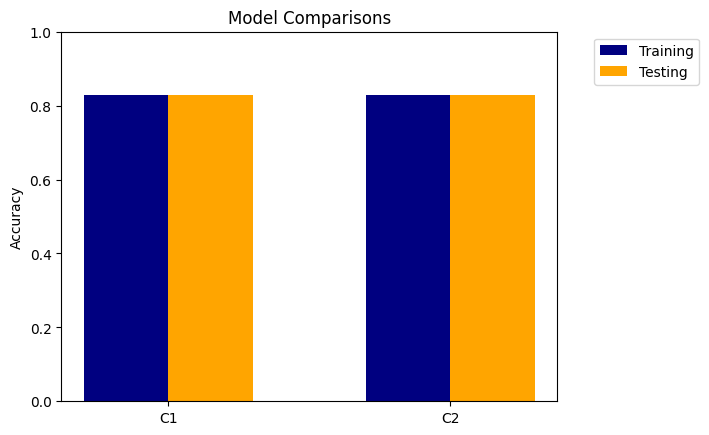

In [22]:
compareModels(cart_classifier, c5_classifier)

# Summary

* Decision trees get smaller with lower max_leaf_nodes and higher max depth
* None for both variables lead to a high amount of decision trees.